# A Project On Credit Card Fraud Detection

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import warnings
#complete the below path after downloading dataset
#link for dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud/download
datafile = ""
data = pd.read_csv(datafile)

# Analyzing and Understanding Data

In [34]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

We see that the class is int data type and all other columns are float. Also, all fields are non null which means that there are no missing values.

In [36]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


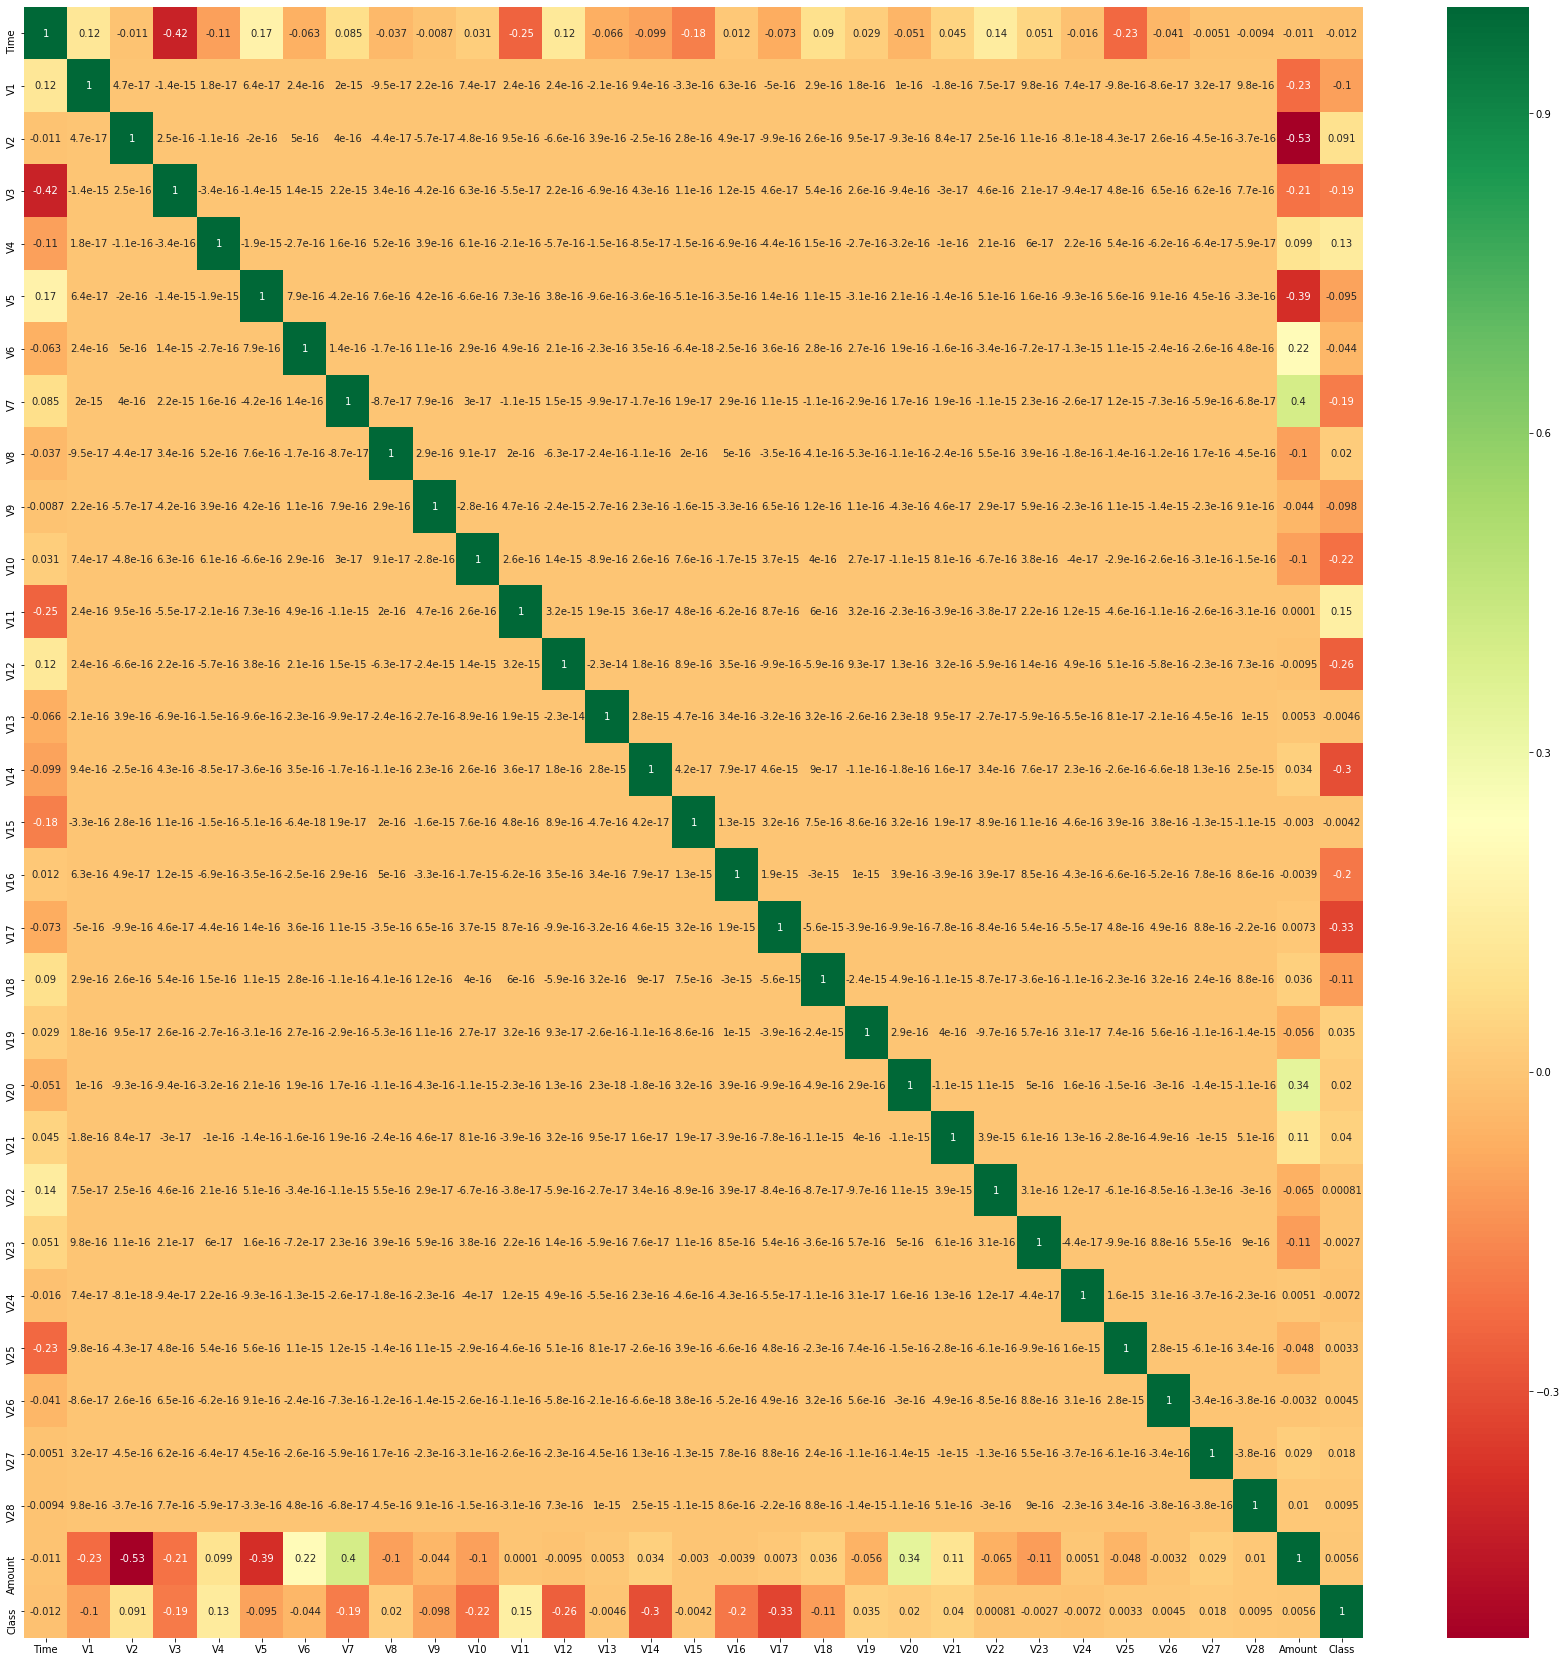

In [37]:
plt.figure(figsize=(30,30))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="RdYlGn", fmt=".2g")
#below is a bug fix code for the plot as it was getting trimmed from top and bottom
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

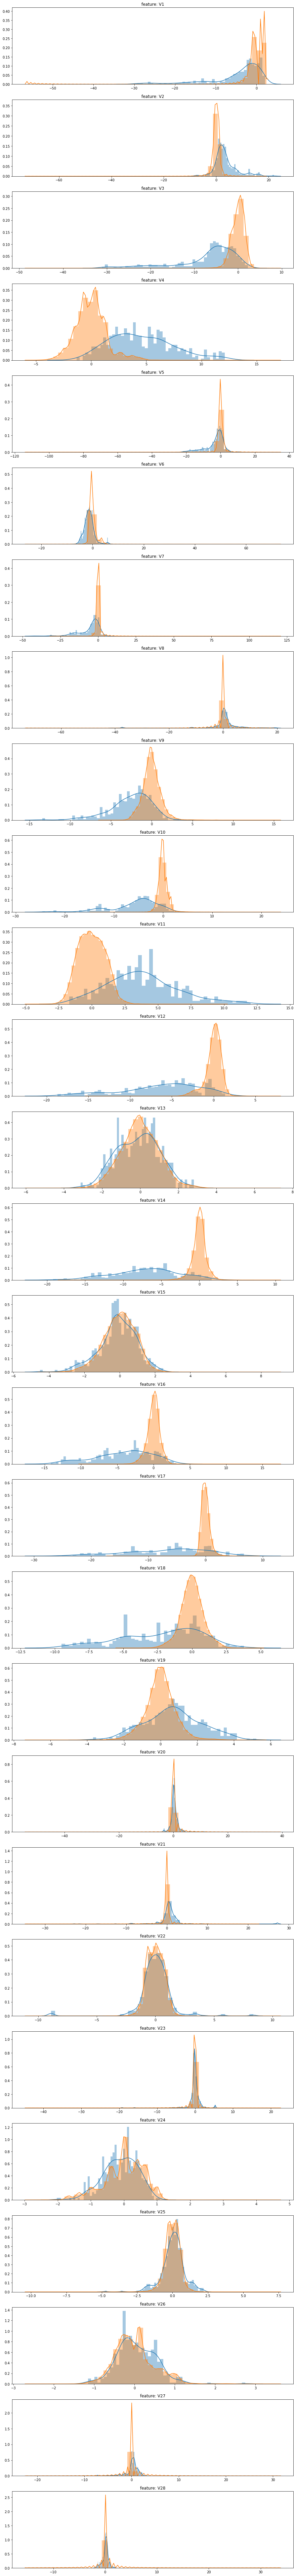

In [38]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(15,28*5))
gridSpec = gridspec.GridSpec(28, 1)
for i, v in enumerate(data[data.iloc[:, 1:29].columns]):
   ax = plt.subplot(gridSpec[i])
   sns.distplot(data[v][data.Class == 1], bins=50)
   sns.distplot(data[v][data.Class == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(v))
plt.show()

[0.01331867 0.01599336 0.0292433  0.03743205 0.01392404 0.01379516
 0.0212807  0.01510577 0.03723043 0.07432891 0.08073302 0.11188983
 0.0134345  0.10521223 0.01390114 0.07064866 0.14717953 0.05082379
 0.0160292  0.01451233 0.01820879 0.01324805 0.00940915 0.013089
 0.0101138  0.01482965 0.01310092 0.011984  ]


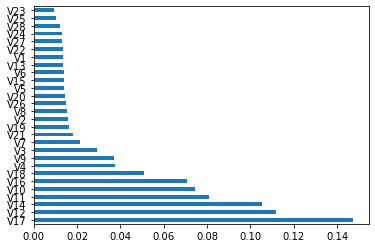

<Figure size 10800x10800 with 0 Axes>

In [39]:
data = pd.read_csv(datafile)
X = data.iloc[:,1:29]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.figure(figsize=(150,150))
plt.show()

From the correlation matrix we can see that V1, V2, V5, V6, V8, V13, V15, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28  have no correlation at all with the class. Furthermore, from the distplot we can visualize that these variables are distributed similarly. Also from the feature importance, a build in class in tree based classifiers we can that these variables do not help in predicting the model. Therefore these features can be dropped from dataset.

# Data Preprocessing

In [40]:
# Function for data preprocessing. The time column does not have any relation with fraud and actual transaction
# So we drop the time column. We use feature scaling to bring amount to same range as other features. Further more
# we drop the variables that we analysed as irrelevant
def preprocessingData(data):
    X = data.drop(['Time'], axis = 1) 
    X = X.drop(['V1', 'V2', 'V5', 'V6', 'V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis =1)
    scaler = StandardScaler()
    X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
    X = X.drop(['Class'], axis = 1) 
    Y = data["Class"] 
    print(X.shape) 
    print(Y.shape) 
    return X.values ,Y.values

In [41]:
xData,yData = preprocessingData(data)

(284807, 12)
(284807,)


# Data Sampling

Actual Transaction: 284315
Fraud Transaction: 492
Proportion: 577.88 : 1


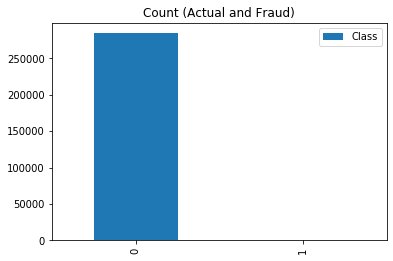

In [42]:
# We are checking how many fraudulent and actual transactions we have
class_count = data.Class.value_counts()
print('Actual Transaction:', class_count[0])
print('Fraud Transaction:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ': 1')
class_count .plot(kind='bar',legend='true', title='Count (Actual and Fraud)');

We see that the dataset is highly unbalanced. For almost every 578 actual transaction we are getting one fraudulent transaction. Therefore, there is a chance our algorithm will overfit thinking almost all the transactions are non fraud. Furthermore, we might now be able to get a true correllation with the target before sampling. So, we are going to sample the dataset for making it more balanced.

In [43]:
# Splitting training and test data randomly in ratio 7:3
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.3, random_state = 42) 


In [44]:
from imblearn.under_sampling import RandomUnderSampler
def undersampleData(xData, yData):
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(xData, yData)
    print(Counter(y_under))
    return X_under, y_under

In [45]:
from imblearn.over_sampling import RandomOverSampler
def overSampleData(xData, yData):
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(xData, yData)
    print(Counter(y_over))
    return xTrain, yTrain

In [46]:
#Function to get test and training data for oversampled model
from imblearn.over_sampling import SMOTE
def smoteOversampleData(xData, yData):
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(xData, yData)
    print(Counter(y_res))
    return xTrain, yTrain

In [47]:
#The undersampled training and test data
xTrainUnderSampled, yTrainUnderSampled = undersampleData(xTrain, yTrain)


Counter({0: 356, 1: 356})


In [48]:
#The oversampled training and test data
xTrainOverSampled, yTrainOverSampled = overSampleData(xTrain, yTrain)

Counter({0: 199008, 1: 199008})


In [49]:
#The Smote oversampled training and test data
xTrainSmoteOverSampled, yTrainSmoteOverSampled = smoteOversampleData(xTrain, yTrain)

Counter({0: 199008, 1: 199008})


# Applying Logistic Regression  to different samples

In [50]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.sm_exceptions import ConvergenceWarning
def createLogisticRegressionForSample(sampleName, xTrain, yTrain):
    # for ignoring the convergence warnings while tuning
    warnings.simplefilter('ignore', ConvergenceWarning)
    # Create logistic regression
    lreg = LogisticRegression(C=.01, penalty='l2',max_iter=500 )
    lreg = lreg.fit(xTrain, yTrain)
    lPred = lreg.predict(xTest)
    print("Accuracy for",sampleName, " : ", lreg.score(xTest,yTest),"\n")
    conf_matrix = confusion_matrix(yTest, lPred) 
    LABELS = ['Normal', 'Fraud'] 
    plt.figure(figsize =(10, 5)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix ") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    
    trueNegative = conf_matrix[0][0]
    falseNegative = conf_matrix[1][0]
    falsePositive = conf_matrix[0][1]
    truePositive = conf_matrix[1][1]
    
    print("The number of actual transaction predicted as actual: ",trueNegative)
    print("The number of fraud transaction predicted as actual: ",falseNegative)
    print("The number of actual transaction predicted as fraud: ",falsePositive)
    print("The number of fraud transaction predicted as fraud: ",truePositive)
    
    # True positive rate (sensitivity or recall)
    truePositiveRate = truePositive / (truePositive + falseNegative)
    # False positive rate (fall-out)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    print("\nTrue positive rate","{:.3f}".format(truePositiveRate))
    print("False positive rate", "{:.3f}".format(falsePositiveRate))

Accuracy for Normal Data  :  0.999204147794436 



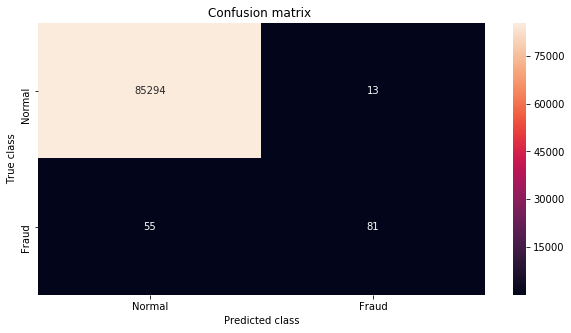

The number of actual transaction predicted as actual:  85294
The number of fraud transaction predicted as actual:  55
The number of actual transaction predicted as fraud:  13
The number of fraud transaction predicted as fraud:  81

True positive rate 0.596
False positive rate 0.000


In [51]:
warnings.simplefilter('ignore', ConvergenceWarning)
createLogisticRegressionForSample("Normal Data", xTrain, yTrain)

Accuracy for Undersampled Data  :  0.989630513909858 



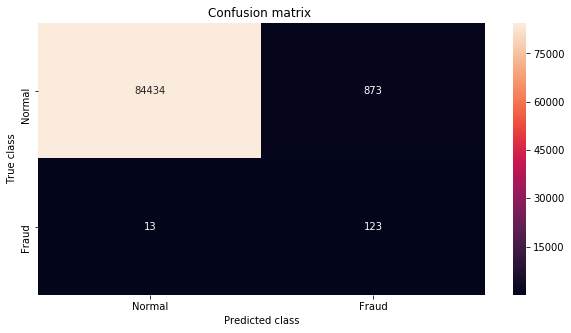

The number of actual transaction predicted as actual:  84434
The number of fraud transaction predicted as actual:  13
The number of actual transaction predicted as fraud:  873
The number of fraud transaction predicted as fraud:  123

True positive rate 0.904
False positive rate 0.010


In [52]:
createLogisticRegressionForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  :  0.999204147794436 



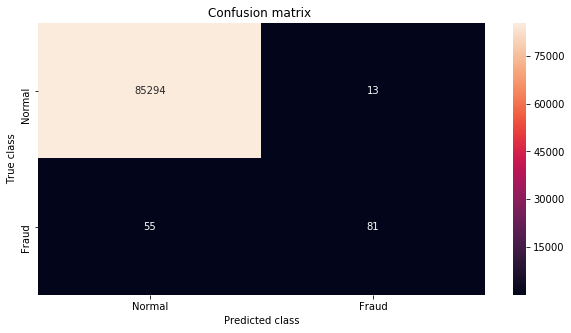

The number of actual transaction predicted as actual:  85294
The number of fraud transaction predicted as actual:  55
The number of actual transaction predicted as fraud:  13
The number of fraud transaction predicted as fraud:  81

True positive rate 0.596
False positive rate 0.000


In [53]:
createLogisticRegressionForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  :  0.999204147794436 



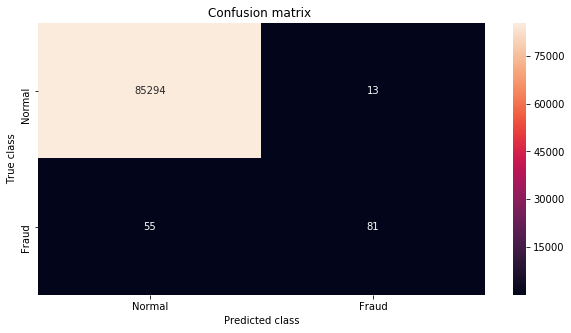

The number of actual transaction predicted as actual:  85294
The number of fraud transaction predicted as actual:  55
The number of actual transaction predicted as fraud:  13
The number of fraud transaction predicted as fraud:  81

True positive rate 0.596
False positive rate 0.000


In [54]:
createLogisticRegressionForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

We can see that the performance we get from logistic regression is bad. This might be due to the fact that dataset is not linearly separable. The dataset is less prone to overfitting and L1 and L2 regularization can be used to prevent the overfitting. We have used a C value of .01 and max iteration of 500 so that we give enough time to converge. The logistic regression is very simple to train and the training needs minimal time compared to other models. Even though the model is easy to understand, it sometimes struggles with the complex relationship between the variables. We also see that the oversampled and smote oversampled have no effect in training compared to the normal sample.

# Applying SVM to different samples

In [55]:
from sklearn.svm import SVC 
def createSVMForSample(sampleName, xTrain, yTrain):
    clf = SVC()
    clf.fit(xTrain, yTrain)
    svmPred = clf.predict(xTest)
    print("Accuracy for",sampleName," :",clf.score(xTest,yTest))
    conf_matrix=confusion_matrix(yTest, svmPred)
    LABELS = ['Normal', 'Fraud'] 
    plt.figure(figsize =(10, 5)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    trueNegative = conf_matrix[0][0]
    falseNegative = conf_matrix[1][0]
    falsePositive = conf_matrix[0][1]
    truePositive = conf_matrix[1][1]
    
    print("The number of actual transaction predicted as actual: ",trueNegative)
    print("The number of fraud transaction predicted as actual: ",falseNegative)
    print("The number of actual transaction predicted as fraud: ",falsePositive)
    print("The number of fraud transaction predicted as fraud: ",truePositive)
    
    # True positive rate (sensitivity or recall)
    truePositiveRate = truePositive / (truePositive + falseNegative)
    # False positive rate (fall-out)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    print("True positive rate","{:.3f}".format(truePositiveRate))
    print("False positive rate", "{:.3f}".format(falsePositiveRate))

Accuracy for normal sample  : 0.9994967405170698


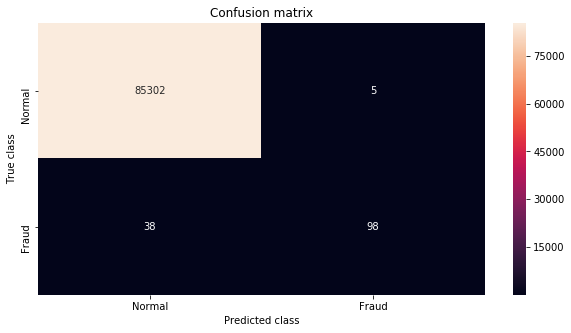

The number of actual transaction predicted as actual:  85302
The number of fraud transaction predicted as actual:  38
The number of actual transaction predicted as fraud:  5
The number of fraud transaction predicted as fraud:  98
True positive rate 0.721
False positive rate 0.000


In [56]:
createSVMForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9877228093582856


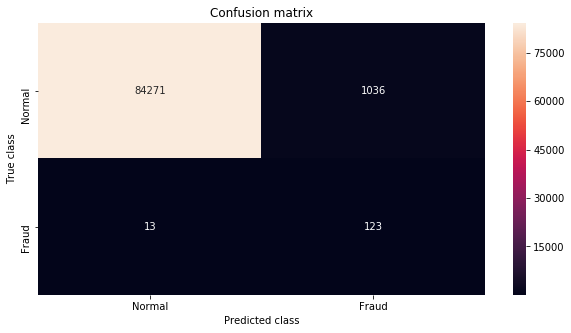

The number of actual transaction predicted as actual:  84271
The number of fraud transaction predicted as actual:  13
The number of actual transaction predicted as fraud:  1036
The number of fraud transaction predicted as fraud:  123
True positive rate 0.904
False positive rate 0.012


In [57]:
createSVMForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9994967405170698


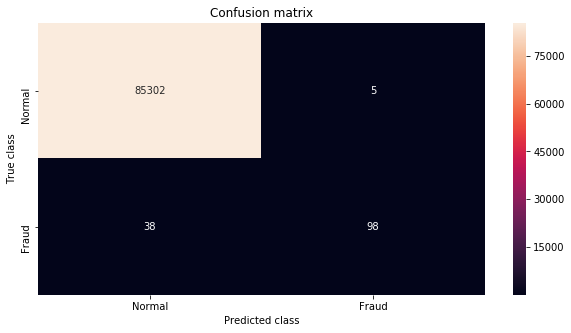

The number of actual transaction predicted as actual:  85302
The number of fraud transaction predicted as actual:  38
The number of actual transaction predicted as fraud:  5
The number of fraud transaction predicted as fraud:  98
True positive rate 0.721
False positive rate 0.000


In [58]:
createSVMForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9994967405170698


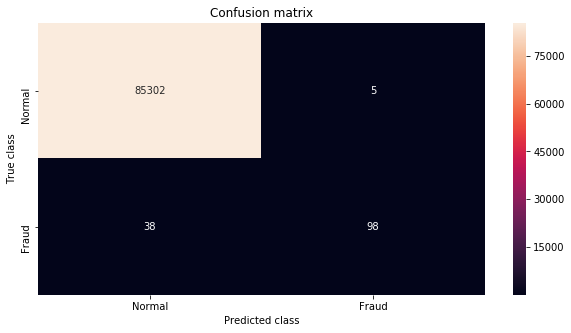

The number of actual transaction predicted as actual:  85302
The number of fraud transaction predicted as actual:  38
The number of actual transaction predicted as fraud:  5
The number of fraud transaction predicted as fraud:  98
True positive rate 0.721
False positive rate 0.000


In [59]:
createSVMForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

We see that the performance of the SVM model is bad. It works better when there is a clear margin of separation and in high dimensional spaces. It is not that effective when the dimensions are less than the number of samples. Also, it requires a much larger training time compared to models like logistic regression. Furthermore, the performance is bad when the dataset contains noise and when the dataset is large. We also see that the oversampled and smote oversampled have no effect in training compared to the normal sample.

# Applying Naive Bayes to different samples

In [60]:
from sklearn.naive_bayes import GaussianNB
def createNaiveBayesForSample(sampleName, xTrain, yTrain):
    clf = GaussianNB()
    clf.fit(xTrain, yTrain)
    nbPred = clf.predict(xTest)
    print("Accuracy for",sampleName," :",clf.score(xTest,yTest))
    conf_matrix=confusion_matrix(yTest, nbPred)
    LABELS = ['Normal', 'Fraud'] 
    plt.figure(figsize =(10, 5)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    trueNegative = conf_matrix[0][0]
    falseNegative = conf_matrix[1][0]
    falsePositive = conf_matrix[0][1]
    truePositive = conf_matrix[1][1]
    
    print("The number of actual transaction predicted as actual: ",trueNegative)
    print("The number of fraud transaction predicted as actual: ",falseNegative)
    print("The number of actual transaction predicted as fraud: ",falsePositive)
    print("The number of fraud transaction predicted as fraud: ",truePositive)
    
    # True positive rate (sensitivity or recall)
    truePositiveRate = truePositive / (truePositive + falseNegative)
    # False positive rate (fall-out)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    print("True positive rate","{:.3f}".format(truePositiveRate))
    print("False positive rate", "{:.3f}".format(falsePositiveRate))

Accuracy for normal sample  : 0.9911051812319324


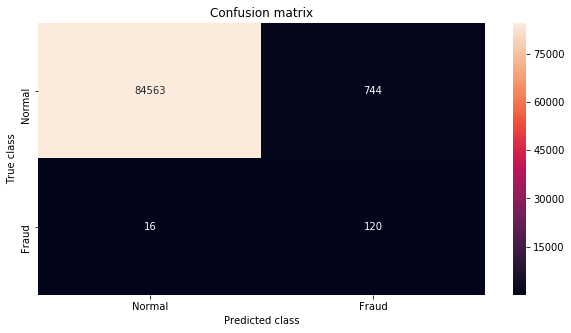

The number of actual transaction predicted as actual:  84563
The number of fraud transaction predicted as actual:  16
The number of actual transaction predicted as fraud:  744
The number of fraud transaction predicted as fraud:  120
True positive rate 0.882
False positive rate 0.009


In [61]:
createNaiveBayesForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9871961424575448


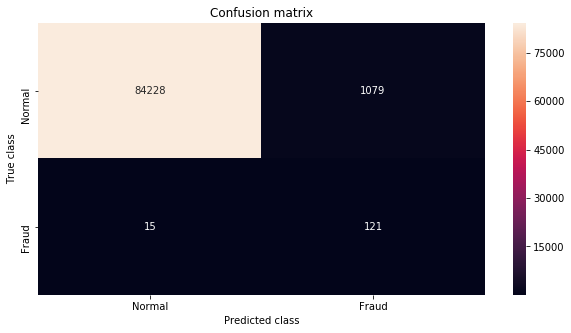

The number of actual transaction predicted as actual:  84228
The number of fraud transaction predicted as actual:  15
The number of actual transaction predicted as fraud:  1079
The number of fraud transaction predicted as fraud:  121
True positive rate 0.890
False positive rate 0.013


In [62]:
createNaiveBayesForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9911051812319324


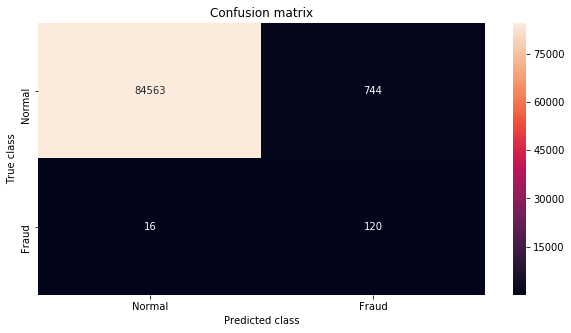

The number of actual transaction predicted as actual:  84563
The number of fraud transaction predicted as actual:  16
The number of actual transaction predicted as fraud:  744
The number of fraud transaction predicted as fraud:  120
True positive rate 0.882
False positive rate 0.009


In [63]:
createNaiveBayesForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9911051812319324


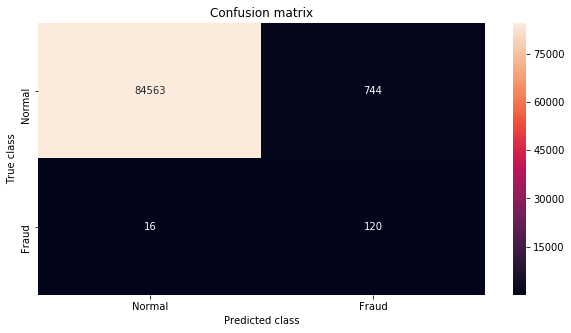

The number of actual transaction predicted as actual:  84563
The number of fraud transaction predicted as actual:  16
The number of actual transaction predicted as fraud:  744
The number of fraud transaction predicted as fraud:  120
True positive rate 0.882
False positive rate 0.009


In [64]:
createNaiveBayesForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

The true positive rates in Naive Bayes are higher compared to Logistic and SVM models. However, we can also observe an increase in the false-positive rate in the model. The performance is better because of the independence in the predicting features we have in our dataset. It is very easy to implement and also requires fewer data to make the prediction. The speed of training is also very high compared to models like SVM. We also see that the oversampled and smote oversampled have no effect in training compared to the normal sample.

# Applying Decision Tree Classifier to different samples

In [65]:
from sklearn.tree import DecisionTreeClassifier
def createDecisionTreeForSample(sampleName, xTrain, yTrain):
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=1000)
    clf.fit(xTrain, yTrain)
    dtcPred = clf.predict(xTest)
    print("Accuracy for",sampleName," :",clf.score(xTest,yTest))
    conf_matrix=confusion_matrix(yTest, dtcPred)
    LABELS = ['Normal', 'Fraud'] 
    plt.figure(figsize =(10, 5)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    
    trueNegative = conf_matrix[0][0]
    falseNegative = conf_matrix[1][0]
    falsePositive = conf_matrix[0][1]
    truePositive = conf_matrix[1][1]
    
    print("The number of actual transaction predicted as actual: ",trueNegative)
    print("The number of fraud transaction predicted as actual: ",falseNegative)
    print("The number of actual transaction predicted as fraud: ",falsePositive)
    print("The number of fraud transaction predicted as fraud: ",truePositive)
    
    # True positive rate (sensitivity or recall)
    truePositiveRate = truePositive / (truePositive + falseNegative)
    # False positive rate (fall-out)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    print("\nTrue positive rate","{:.3f}".format(truePositiveRate))
    print("False positive rate", "{:.3f}".format(falsePositiveRate))

Accuracy for normal sample  : 0.9992626663389628


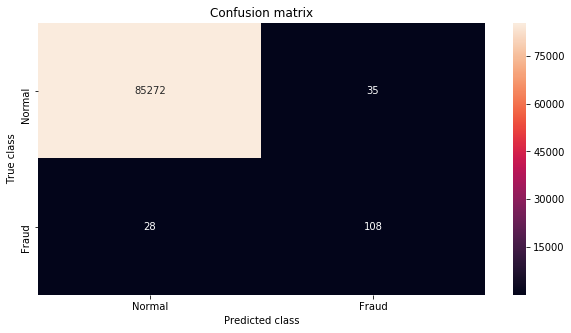

The number of actual transaction predicted as actual:  85272
The number of fraud transaction predicted as actual:  28
The number of actual transaction predicted as fraud:  35
The number of fraud transaction predicted as fraud:  108

True positive rate 0.794
False positive rate 0.000


In [66]:
createDecisionTreeForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9071661809627471


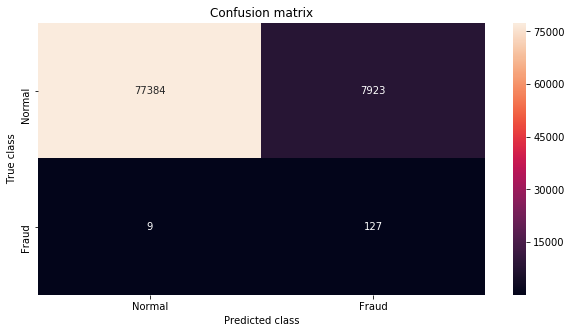

The number of actual transaction predicted as actual:  77384
The number of fraud transaction predicted as actual:  9
The number of actual transaction predicted as fraud:  7923
The number of fraud transaction predicted as fraud:  127

True positive rate 0.934
False positive rate 0.093


In [67]:
createDecisionTreeForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9992509626300574


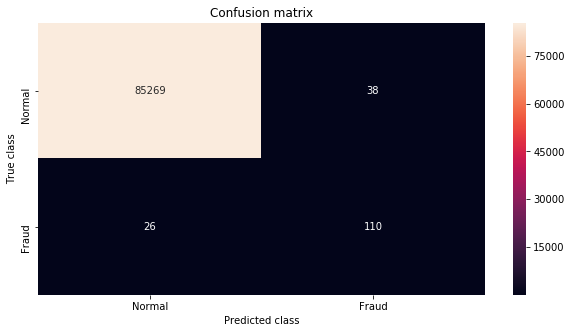

The number of actual transaction predicted as actual:  85269
The number of fraud transaction predicted as actual:  26
The number of actual transaction predicted as fraud:  38
The number of fraud transaction predicted as fraud:  110

True positive rate 0.809
False positive rate 0.000


In [68]:
createDecisionTreeForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9992509626300574


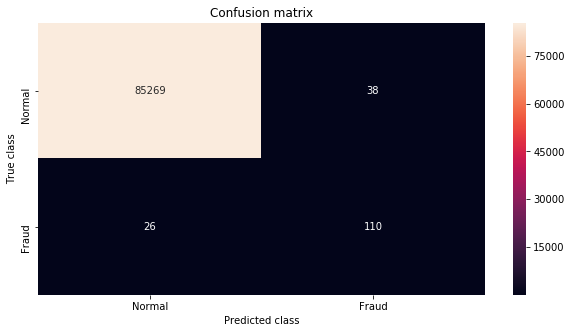

The number of actual transaction predicted as actual:  85269
The number of fraud transaction predicted as actual:  26
The number of actual transaction predicted as fraud:  38
The number of fraud transaction predicted as fraud:  110

True positive rate 0.809
False positive rate 0.000


In [69]:
createDecisionTreeForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

We can see that the performance of the decision tree algorithm is better compared to Logistic and SVM algorithms. Decision tree does not require any normalization of data. Using decision tree helps to interpret the data easily. Furthermore, it is very easy to implement. Additionally, it can handle large datasets with Non-Linear and Discontinuous data. However, one thing we need to keep in mind for decision tree classifiers is that it is prone to overfitting especially at large depth. Also, it takes much more computational time for training a decision tree model. Even a small change in data can cause the structure of the decision tree to change. This can also be seen from the fact that oversampled and smote oversampled have slightly better performance than the normal sample.

# Applying Adaboost classifier to different samples

In [70]:
from sklearn.ensemble import AdaBoostClassifier
def createAdaboostForSample(sampleName, xTrain, yTrain):
    clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1000))
    clf.fit(xTrain, yTrain)
    aPred = clf.predict(xTest)
    print("Accuracy for",sampleName," :",clf.score(xTest,yTest))
    conf_matrix=confusion_matrix(yTest, aPred)
    LABELS = ['Normal', 'Fraud'] 
    plt.figure(figsize =(10, 5)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    trueNegative = conf_matrix[0][0]
    falseNegative = conf_matrix[1][0]
    falsePositive = conf_matrix[0][1]
    truePositive = conf_matrix[1][1]
    
    print("The number of actual transaction predicted as actual: ",trueNegative)
    print("The number of fraud transaction predicted as actual: ",falseNegative)
    print("The number of actual transaction predicted as fraud: ",falsePositive)
    print("The number of fraud transaction predicted as fraud: ",truePositive)
    
    # True positive rate (sensitivity or recall)
    truePositiveRate = truePositive / (truePositive + falseNegative)
    # False positive rate (fall-out)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    print("True positive rate","{:.3f}".format(truePositiveRate))
    print("False positive rate", "{:.3f}".format(falsePositiveRate))

Accuracy for normal sample  : 0.9990285921608558


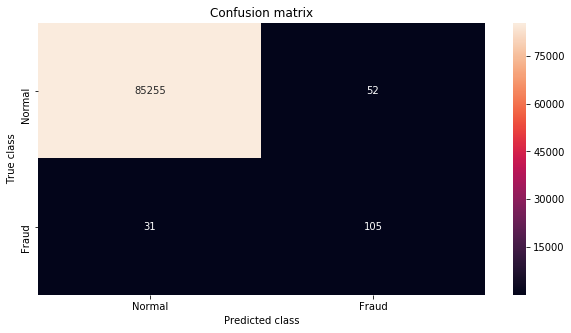

The number of actual transaction predicted as actual:  85255
The number of fraud transaction predicted as actual:  31
The number of actual transaction predicted as fraud:  52
The number of fraud transaction predicted as fraud:  105
True positive rate 0.772
False positive rate 0.001


In [71]:
createAdaboostForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9153002586519668


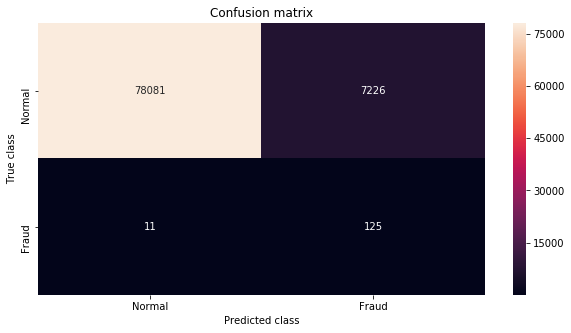

The number of actual transaction predicted as actual:  78081
The number of fraud transaction predicted as actual:  11
The number of actual transaction predicted as fraud:  7226
The number of fraud transaction predicted as fraud:  125
True positive rate 0.919
False positive rate 0.085


In [72]:
createAdaboostForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9991222218320986


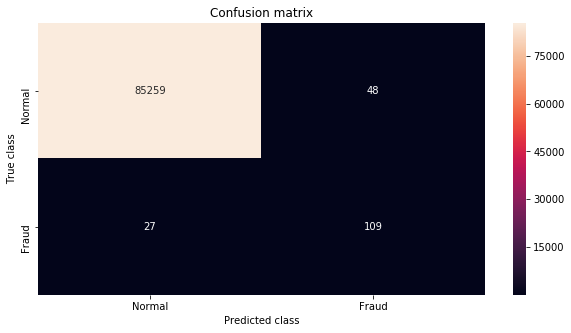

The number of actual transaction predicted as actual:  85259
The number of fraud transaction predicted as actual:  27
The number of actual transaction predicted as fraud:  48
The number of fraud transaction predicted as fraud:  109
True positive rate 0.801
False positive rate 0.001


In [73]:
createAdaboostForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9991573329588147


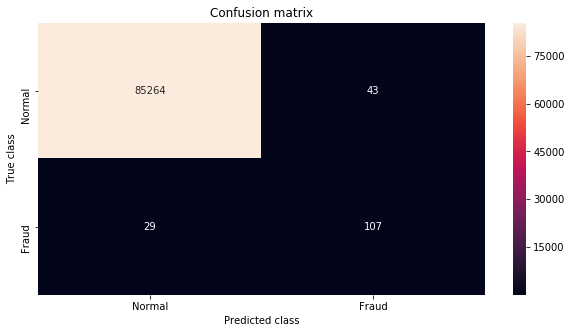

The number of actual transaction predicted as actual:  85264
The number of fraud transaction predicted as actual:  29
The number of actual transaction predicted as fraud:  43
The number of fraud transaction predicted as fraud:  107
True positive rate 0.787
False positive rate 0.001


In [74]:
createAdaboostForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

Even though AdaBoost usually gives a better performance when used in conjunction with decision tree we observer that we get a poorer performance. It might be because AdaBoost attached significant weight to incorrectly classified data affecting the performance of the model. One thing we need to be careful when we use this technique is that it is very susceptible to noise and outliers. This model is easy to implement. We can see that the oversampled and smote over sampled have slightly better performance. The slight increase in false-positive rates could be due to the weight attached to incorrectly classified data.

# Applying RandomForest Classifier to different samples

In [75]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
def createRandomForestForSample(sampleName, xTrain, yTrain):
    rfc = RandomForestClassifier(n_estimators=150) 
    #rfc.fit(xTrain, yTrain) 
    rfc.fit(xTrain, yTrain) 
    # predictions 
    yPred = rfc.predict(xTest) 
    acc = accuracy_score(yTest, yPred) 
    print("The accuracy for ",sampleName ," is {}".format(acc)) 
    from sklearn.metrics import confusion_matrix 
    LABELS = ['Normal', 'Fraud'] 
    conf_matrix = confusion_matrix(yTest, yPred) 
    plt.figure(figsize =(10, 5)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix ") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    print(classification_report(yTest, yPred, target_names=['Normal', 'Fraud']))
    
    trueNegative = conf_matrix[0][0]
    falseNegative = conf_matrix[1][0]
    falsePositive = conf_matrix[0][1]
    truePositive = conf_matrix[1][1]
    
    print("The number of actual transaction predicted as actual: ",trueNegative)
    print("The number of fraud transaction predicted as actual: ",falseNegative)
    print("The number of actual transaction predicted as fraud: ",falsePositive)
    print("The number of fraud transaction predicted as fraud: ",truePositive)
    
    # True positive rate (sensitivity or recall)
    truePositiveRate = truePositive / (truePositive + falseNegative)
    # False positive rate (fall-out)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    print("True positive rate","{:.3f}".format(truePositiveRate))
    print("False positive rate", "{:.3f}".format(falsePositiveRate))

The accuracy for  normal sample  is 0.9996488887328394


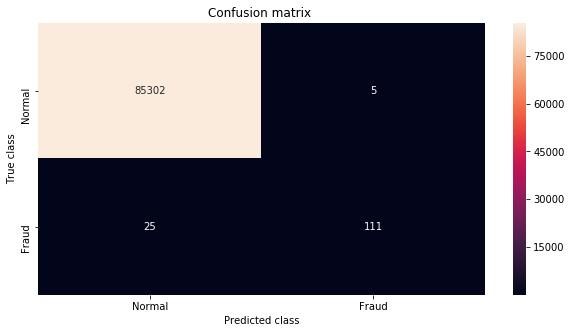

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85307
       Fraud       0.96      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

The number of actual transaction predicted as actual:  85302
The number of fraud transaction predicted as actual:  25
The number of actual transaction predicted as fraud:  5
The number of fraud transaction predicted as fraud:  111
True positive rate 0.816
False positive rate 0.000


In [76]:
createRandomForestForSample("normal sample", xTrain,yTrain)

The accuracy for  undersampled data  is 0.9702140608358789


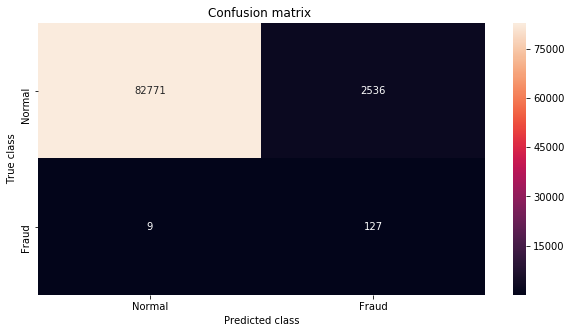

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98     85307
       Fraud       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

The number of actual transaction predicted as actual:  82771
The number of fraud transaction predicted as actual:  9
The number of actual transaction predicted as fraud:  2536
The number of fraud transaction predicted as fraud:  127
True positive rate 0.934
False positive rate 0.030


In [77]:
createRandomForestForSample("undersampled data", xTrainUnderSampled,yTrainUnderSampled)

The accuracy for  oversampled data  is 0.9996371850239341


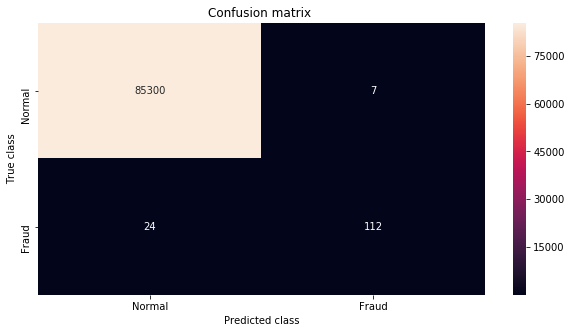

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85307
       Fraud       0.94      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

The number of actual transaction predicted as actual:  85300
The number of fraud transaction predicted as actual:  24
The number of actual transaction predicted as fraud:  7
The number of fraud transaction predicted as fraud:  112
True positive rate 0.824
False positive rate 0.000


In [78]:
createRandomForestForSample("oversampled data", xTrainOverSampled,yTrainOverSampled)

The accuracy for  smoteOversampled sample  is 0.9996371850239341


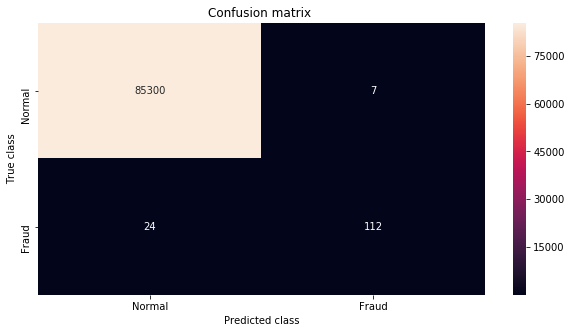

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85307
       Fraud       0.94      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

The number of actual transaction predicted as actual:  85300
The number of fraud transaction predicted as actual:  24
The number of actual transaction predicted as fraud:  7
The number of fraud transaction predicted as fraud:  112
True positive rate 0.824
False positive rate 0.000


In [79]:
createRandomForestForSample("smoteOversampled sample", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

We can see that the random forest classifier gives a very good performance. It easily handles large dataset with nonlinear and discontinuous data. We may find it difficult to interpret the trained model. Also, it takes a longer time to train the model compared to models like Naive Bayes. We can see that the oversampled and smote over sampled have slightly better performance. 

# Applying neural network to different samples

In [80]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
def createANNForSample(sampleName, xTrain, yTrain):
    # We are going to use a neural network that use three hidden layers network
    classifier = Sequential()
    classifier.add(Dense(units = 6 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    # output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Fitting the ANN to the Training set
    classifier.fit(xTrain,yTrain, batch_size = 32, epochs = 100)
    # Predicting the Test set results
    annPred = classifier.predict(xTest)
    # Since Confusion and Classification metrics can't handle a mix of binary and continuous targets
    annPred = (annPred > 0.5)
    conf_matrix=confusion_matrix(yTest, annPred)
    LABELS = ['Normal', 'Fraud'] 
    plt.figure(figsize =(10, 5)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS,  
    yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    #truePositive = np.sum(yTest * annPred)
    #falseNegative = np.sum(yTest * (annPred==0))
    #falsePositive = np.sum((yTest == 0) * annPred)
    #trueNegative = np.sum((yTest==0) * (annPred==0))
    trueNegative = conf_matrix[0][0]
    falseNegative = conf_matrix[1][0]
    falsePositive = conf_matrix[0][1]
    truePositive = conf_matrix[1][1]
    
    print("The number of actual transaction predicted as actual: ",trueNegative)
    print("The number of fraud transaction predicted as actual: ",falseNegative)
    print("The number of actual transaction predicted as fraud: ",falsePositive)
    print("The number of fraud transaction predicted as fraud: ",truePositive)
    # True positive rate (sensitivity or recall)
    truePositiveRate = truePositive / (truePositive + falseNegative)
    # False positive rate (fall-out)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    print("\nTrue positive rate","{:.3f}".format(truePositiveRate))
    print("False positive rate", "{:.3f}".format(falsePositiveRate))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
199364/199364 [==============================] - 6s 28us/step - loss: 0.0205 - accuracy: 0.9982
Epoch 2/100
199364/199364 [==============================] - 5s 27us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0035 - accuracy: 0.9993
Epoch 5/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 6/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 7/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 8/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 9/100
199364/199364 [===============

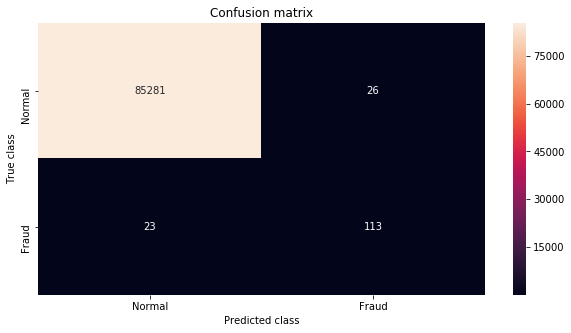

The number of actual transaction predicted as actual:  85281
The number of fraud transaction predicted as actual:  23
The number of actual transaction predicted as fraud:  26
The number of fraud transaction predicted as fraud:  113

True positive rate 0.831
False positive rate 0.000


In [81]:
createANNForSample("normal sample",xTrain,yTrain)

Epoch 1/100
712/712 [==============================] - 0s 368us/step - loss: 0.6931 - accuracy: 0.4902
Epoch 2/100
712/712 [==============================] - 0s 35us/step - loss: 0.6909 - accuracy: 0.5885
Epoch 3/100
712/712 [==============================] - 0s 34us/step - loss: 0.6729 - accuracy: 0.9045
Epoch 4/100
712/712 [==============================] - 0s 34us/step - loss: 0.6040 - accuracy: 0.8904
Epoch 5/100
712/712 [==============================] - 0s 31us/step - loss: 0.4962 - accuracy: 0.9003
Epoch 6/100
712/712 [==============================] - 0s 28us/step - loss: 0.4296 - accuracy: 0.9115
Epoch 7/100
712/712 [==============================] - 0s 26us/step - loss: 0.3970 - accuracy: 0.9284
Epoch 8/100
712/712 [==============================] - 0s 28us/step - loss: 0.3742 - accuracy: 0.9326
Epoch 9/100
712/712 [==============================] - 0s 27us/step - loss: 0.3547 - accuracy: 0.9396
Epoch 10/100
712/712 [==============================] - 0s 28us/step - loss: 0.33

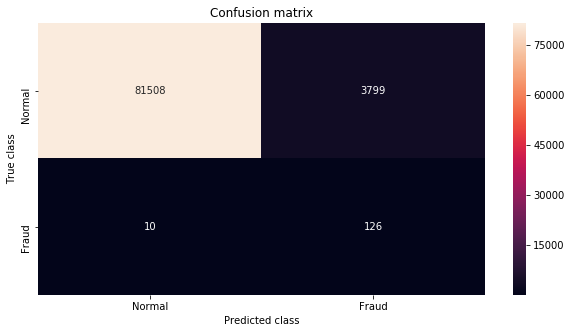

The number of actual transaction predicted as actual:  81508
The number of fraud transaction predicted as actual:  10
The number of actual transaction predicted as fraud:  3799
The number of fraud transaction predicted as fraud:  126

True positive rate 0.926
False positive rate 0.045


In [82]:
createANNForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Epoch 1/100
199364/199364 [==============================] - 6s 28us/step - loss: 0.0219 - accuracy: 0.9982
Epoch 2/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0038 - accuracy: 0.9992
Epoch 3/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994 0s - loss: 0.0033 - accura
Epoch 6/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 7/100
199364/199364 [==============================] - 7197s 36ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 8/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 9/100
199364/199364 [==============================] - 7220s 36ms/step - loss: 0.0032 - accuracy: 0.

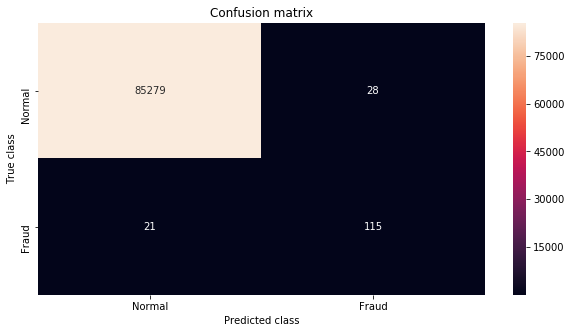

The number of actual transaction predicted as actual:  85279
The number of fraud transaction predicted as actual:  21
The number of actual transaction predicted as fraud:  28
The number of fraud transaction predicted as fraud:  115

True positive rate 0.846
False positive rate 0.000


In [83]:
createANNForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Epoch 1/100
199364/199364 [==============================] - 6s 30us/step - loss: 0.0206 - accuracy: 0.9982
Epoch 2/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 6/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 7/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 8/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 9/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 10/100
199364/199364 [

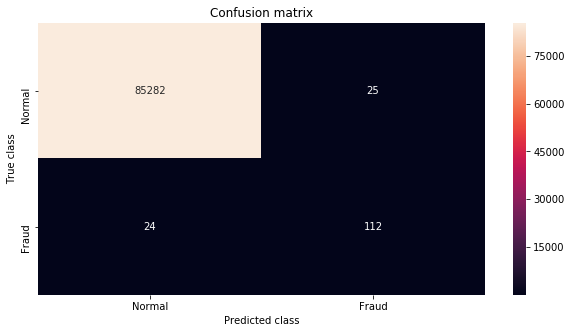

The number of actual transaction predicted as actual:  85282
The number of fraud transaction predicted as actual:  24
The number of actual transaction predicted as fraud:  25
The number of fraud transaction predicted as fraud:  112

True positive rate 0.824
False positive rate 0.000


In [84]:
createANNForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

We can see that the neural network gives a very good performance. It can handle extremely complex relationships, large and nonlinear dataset to give a good performance. However, it is very difficult to interpret the trained model. Furthermore, training the model requires a lot of computational power and time. The neural networks are highly tolerant to noise. We also observe that the oversampled gives slightly better performance to the normal data.

# Time based approach for train and test

In this we will take first part of our data which is sorted by time for training instead of randomly splitting training and test data.

In [85]:
data = pd.read_csv(datafile)
data.head() 
trainingSet,testSet=np.split(data,[int(.7*len(data))])
trainingSet

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,132927.0,-0.891484,0.017809,3.078285,0.292308,-0.808503,2.322562,-1.165476,-0.260185,0.057021,...,0.446677,0.107023,-0.374529,0.362141,0.536869,-0.204159,0.357010,-0.071318,25.00,0
199360,132927.0,1.921305,0.395242,-2.318680,1.398477,1.033023,-0.642820,0.629670,-0.211760,-0.178606,...,0.037927,0.218286,-0.030503,0.589564,0.442069,-0.546391,-0.009510,-0.025723,40.46,0
199361,132927.0,-0.638489,0.057029,1.022120,-1.267570,0.573539,0.253991,-0.351760,0.227176,-1.562525,...,0.311661,0.787535,-0.433117,0.161191,0.591464,0.193631,0.072301,0.100244,22.00,0
199362,132928.0,-1.383590,-5.632354,-4.637217,1.364093,-0.042684,1.207176,2.887418,-0.417337,-0.258312,...,1.414935,0.395609,-1.539984,-0.423408,-0.330285,0.929866,-0.412846,0.196356,1745.40,0


In [86]:
testSet

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199364,132929.0,-1.504565,-1.047164,2.658591,-0.246340,0.342667,0.182682,-0.424257,0.300896,0.638538,...,0.371965,0.798937,-0.048231,-0.437821,0.412388,-0.085327,-0.131134,-0.127378,118.58,0
199365,132929.0,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,...,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,55.95,0
199366,132929.0,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,...,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,0.79,0
199367,132929.0,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,...,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,30.90,0
199368,132930.0,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,...,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,1.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [87]:
xTrain,yTrain = preprocessingData(trainingSet)
xTest,yTest=preprocessingData(testSet)
xTest

(199364, 12)
(199364,)
(85443, 12)
(85443,)


array([[ 2.65859123, -0.24634034, -0.42425664, ..., -0.93545272,
         1.44698081,  0.13265785],
       [-1.09245579, -0.99496908, -0.53021756, ..., -0.11584012,
        -1.59476997, -0.11500287],
       [ 0.54288798,  3.60622179, -0.87459766, ..., -1.33518089,
         0.43129447, -0.33312461],
       ...,
       [-3.24963981, -0.55782812, -0.29682653, ...,  0.31350179,
         0.39565248, -0.06782751],
       [ 0.70251023,  0.68979917, -0.68617999, ...,  0.50992846,
         1.11398059, -0.29670508],
       [ 0.70333737, -0.50627124,  1.57700625, ..., -0.66037665,
         0.16742993,  0.52184462]])

Accuracy for normal sample  :  0.9992626663389628 



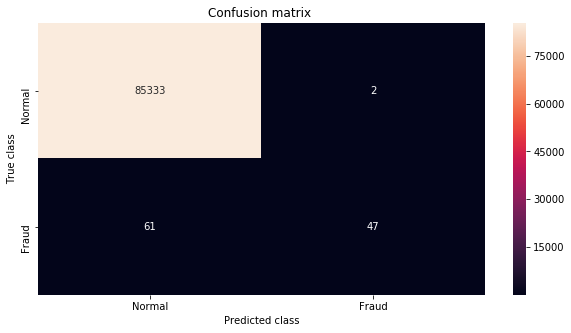

The number of actual transaction predicted as actual:  85333
The number of fraud transaction predicted as actual:  61
The number of actual transaction predicted as fraud:  2
The number of fraud transaction predicted as fraud:  47

True positive rate 0.435
False positive rate 0.000


In [88]:
createLogisticRegressionForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  :  0.9921351076156034 



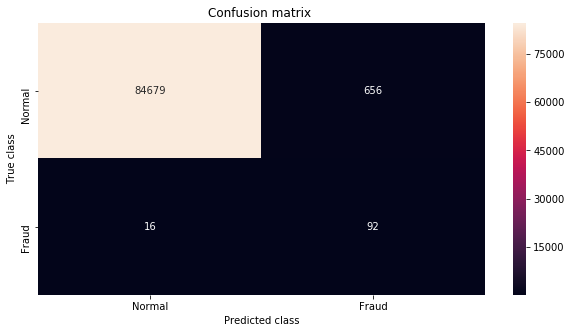

The number of actual transaction predicted as actual:  84679
The number of fraud transaction predicted as actual:  16
The number of actual transaction predicted as fraud:  656
The number of fraud transaction predicted as fraud:  92

True positive rate 0.852
False positive rate 0.008


In [89]:
createLogisticRegressionForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  :  0.9993328885923949 



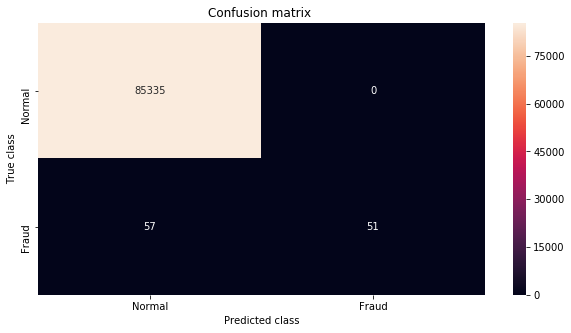

The number of actual transaction predicted as actual:  85335
The number of fraud transaction predicted as actual:  57
The number of actual transaction predicted as fraud:  0
The number of fraud transaction predicted as fraud:  51

True positive rate 0.472
False positive rate 0.000


In [90]:
createLogisticRegressionForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  :  0.9993328885923949 



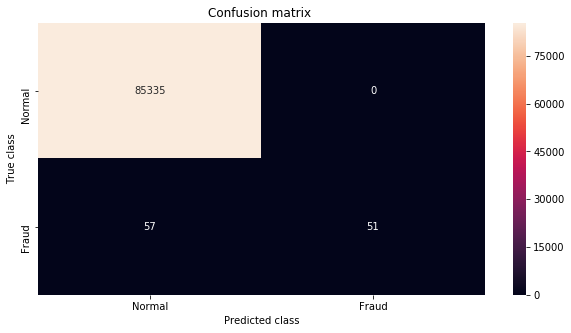

The number of actual transaction predicted as actual:  85335
The number of fraud transaction predicted as actual:  57
The number of actual transaction predicted as fraud:  0
The number of fraud transaction predicted as fraud:  51

True positive rate 0.472
False positive rate 0.000


In [91]:
createLogisticRegressionForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

Accuracy for normal sample  : 0.9994850368081645


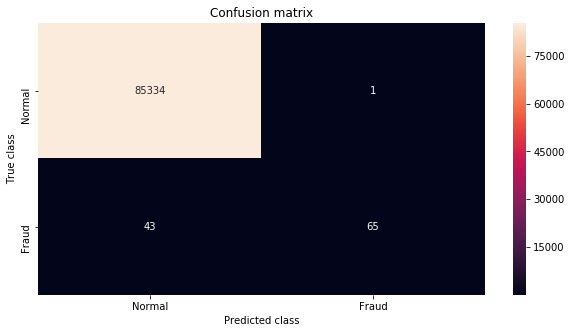

The number of actual transaction predicted as actual:  85334
The number of fraud transaction predicted as actual:  43
The number of actual transaction predicted as fraud:  1
The number of fraud transaction predicted as fraud:  65
True positive rate 0.602
False positive rate 0.000


In [92]:
createSVMForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9903327364441792


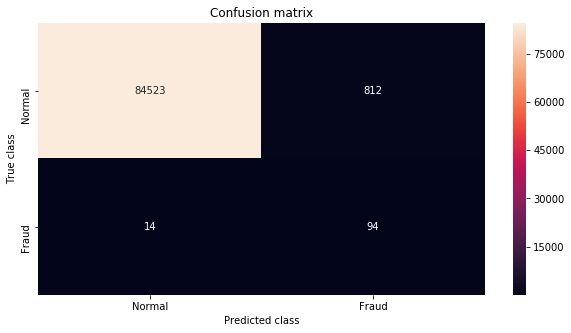

The number of actual transaction predicted as actual:  84523
The number of fraud transaction predicted as actual:  14
The number of actual transaction predicted as fraud:  812
The number of fraud transaction predicted as fraud:  94
True positive rate 0.870
False positive rate 0.010


In [93]:
createSVMForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9996605924417448


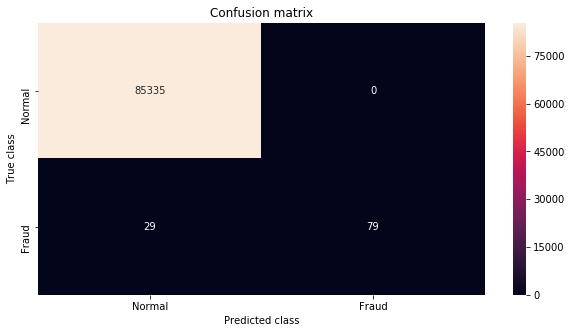

The number of actual transaction predicted as actual:  85335
The number of fraud transaction predicted as actual:  29
The number of actual transaction predicted as fraud:  0
The number of fraud transaction predicted as fraud:  79
True positive rate 0.731
False positive rate 0.000


In [94]:
createSVMForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9996605924417448


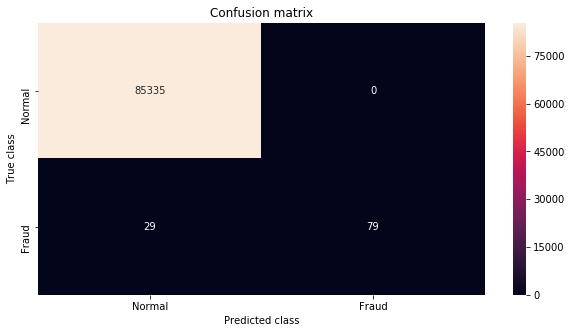

The number of actual transaction predicted as actual:  85335
The number of fraud transaction predicted as actual:  29
The number of actual transaction predicted as fraud:  0
The number of fraud transaction predicted as fraud:  79
True positive rate 0.731
False positive rate 0.000


In [95]:
createSVMForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

Accuracy for normal sample  : 0.99085940334492


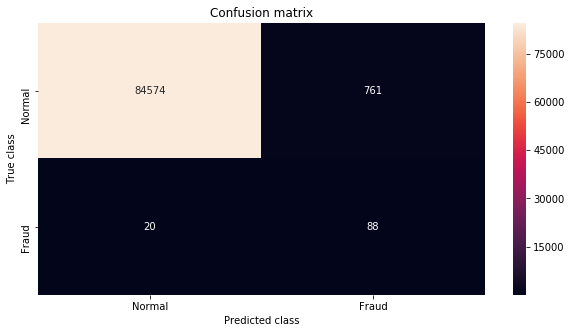

The number of actual transaction predicted as actual:  84574
The number of fraud transaction predicted as actual:  20
The number of actual transaction predicted as fraud:  761
The number of fraud transaction predicted as fraud:  88
True positive rate 0.815
False positive rate 0.009


In [96]:
createNaiveBayesForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9885888838172817


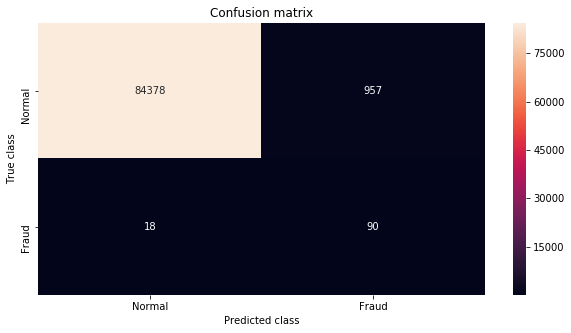

The number of actual transaction predicted as actual:  84378
The number of fraud transaction predicted as actual:  18
The number of actual transaction predicted as fraud:  957
The number of fraud transaction predicted as fraud:  90
True positive rate 0.833
False positive rate 0.011


In [97]:
createNaiveBayesForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9914328850812822


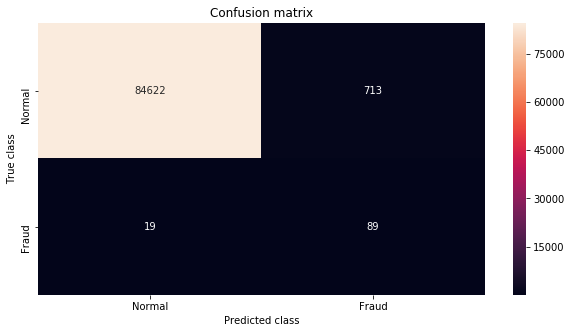

The number of actual transaction predicted as actual:  84622
The number of fraud transaction predicted as actual:  19
The number of actual transaction predicted as fraud:  713
The number of fraud transaction predicted as fraud:  89
True positive rate 0.824
False positive rate 0.008


In [98]:
createNaiveBayesForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9914328850812822


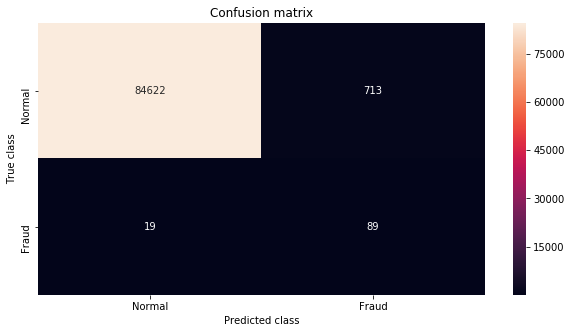

The number of actual transaction predicted as actual:  84622
The number of fraud transaction predicted as actual:  19
The number of actual transaction predicted as fraud:  713
The number of fraud transaction predicted as fraud:  89
True positive rate 0.824
False positive rate 0.008


In [99]:
createNaiveBayesForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

Accuracy for normal sample  : 0.999204147794436


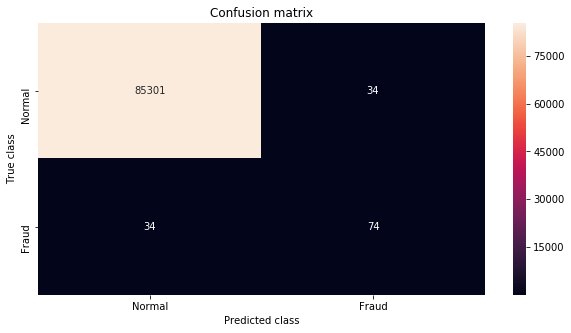

The number of actual transaction predicted as actual:  85301
The number of fraud transaction predicted as actual:  34
The number of actual transaction predicted as fraud:  34
The number of fraud transaction predicted as fraud:  74

True positive rate 0.685
False positive rate 0.000


In [100]:
createDecisionTreeForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9029645494657257


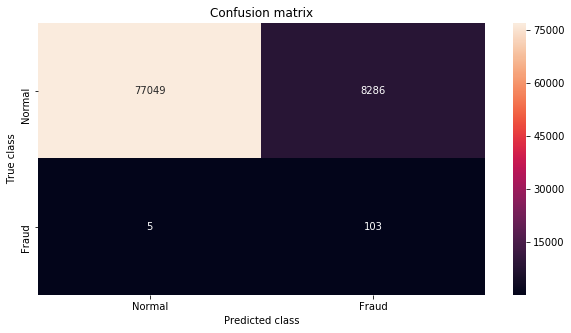

The number of actual transaction predicted as actual:  77049
The number of fraud transaction predicted as actual:  5
The number of actual transaction predicted as fraud:  8286
The number of fraud transaction predicted as fraud:  103

True positive rate 0.954
False positive rate 0.097


In [101]:
createDecisionTreeForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9996722961506501


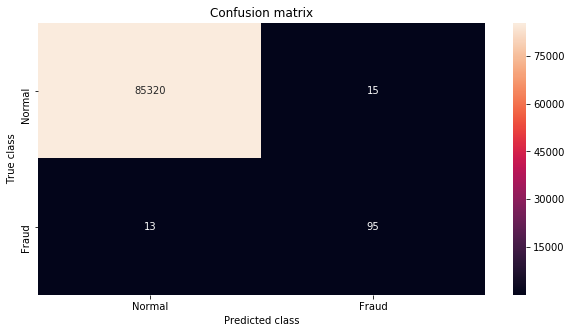

The number of actual transaction predicted as actual:  85320
The number of fraud transaction predicted as actual:  13
The number of actual transaction predicted as fraud:  15
The number of fraud transaction predicted as fraud:  95

True positive rate 0.880
False positive rate 0.000


In [102]:
createDecisionTreeForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9996371850239341


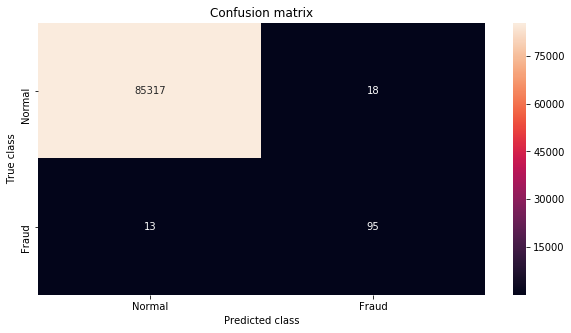

The number of actual transaction predicted as actual:  85317
The number of fraud transaction predicted as actual:  13
The number of actual transaction predicted as fraud:  18
The number of fraud transaction predicted as fraud:  95

True positive rate 0.880
False positive rate 0.000


In [103]:
createDecisionTreeForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

Accuracy for normal sample  : 0.9991456292499094


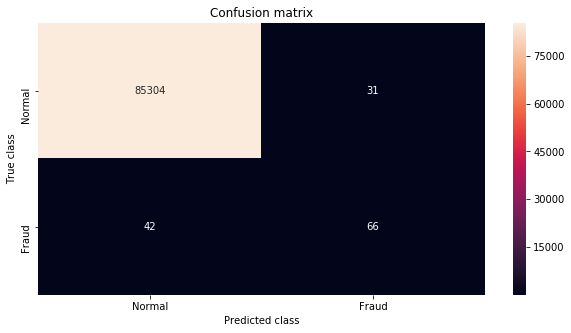

The number of actual transaction predicted as actual:  85304
The number of fraud transaction predicted as actual:  42
The number of actual transaction predicted as fraud:  31
The number of fraud transaction predicted as fraud:  66
True positive rate 0.611
False positive rate 0.000


In [104]:
createAdaboostForSample("normal sample",xTrain,yTrain)

Accuracy for Undersampled Data  : 0.9242887070912772


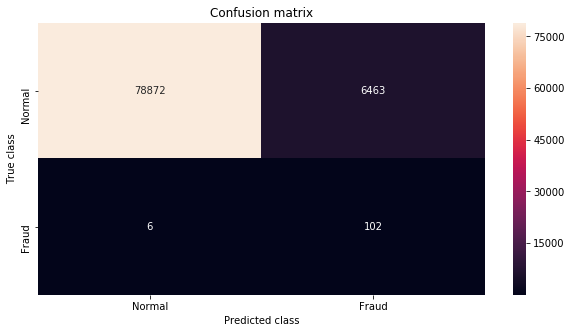

The number of actual transaction predicted as actual:  78872
The number of fraud transaction predicted as actual:  6
The number of actual transaction predicted as fraud:  6463
The number of fraud transaction predicted as fraud:  102
True positive rate 0.944
False positive rate 0.076


In [105]:
createAdaboostForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Accuracy for Oversampled Data  : 0.9996605924417448


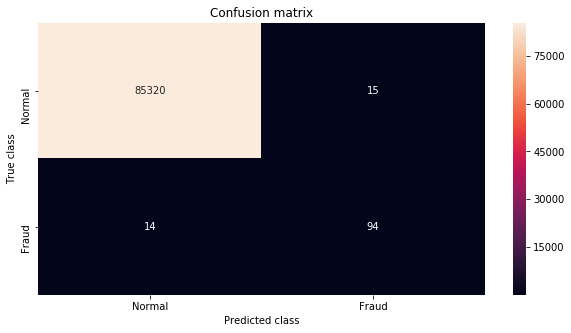

The number of actual transaction predicted as actual:  85320
The number of fraud transaction predicted as actual:  14
The number of actual transaction predicted as fraud:  15
The number of fraud transaction predicted as fraud:  94
True positive rate 0.870
False positive rate 0.000


In [106]:
createAdaboostForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Accuracy for SmoteOversampled Data  : 0.9996254813150287


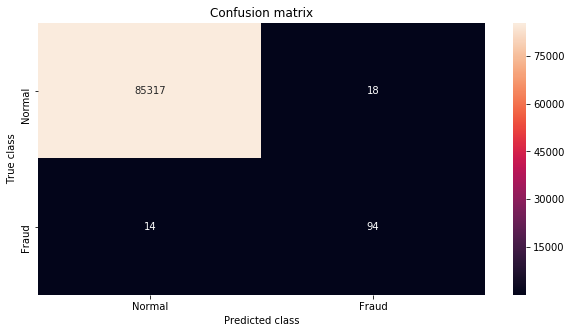

The number of actual transaction predicted as actual:  85317
The number of fraud transaction predicted as actual:  14
The number of actual transaction predicted as fraud:  18
The number of fraud transaction predicted as fraud:  94
True positive rate 0.870
False positive rate 0.000


In [107]:
createAdaboostForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

The accuracy for  normal sample  is 0.9996488887328394


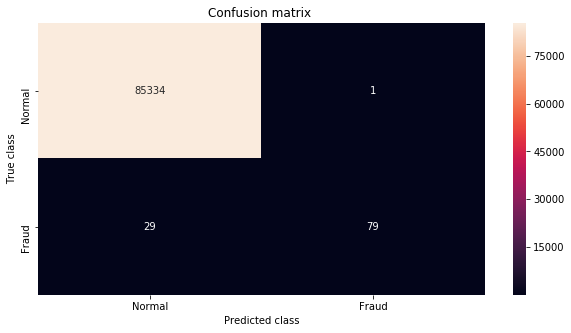

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85335
       Fraud       0.99      0.73      0.84       108

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

The number of actual transaction predicted as actual:  85334
The number of fraud transaction predicted as actual:  29
The number of actual transaction predicted as fraud:  1
The number of fraud transaction predicted as fraud:  79
True positive rate 0.731
False positive rate 0.000


In [108]:
createRandomForestForSample("normal sample",xTrain,yTrain)

The accuracy for  Undersampled Data  is 0.9644207249277296


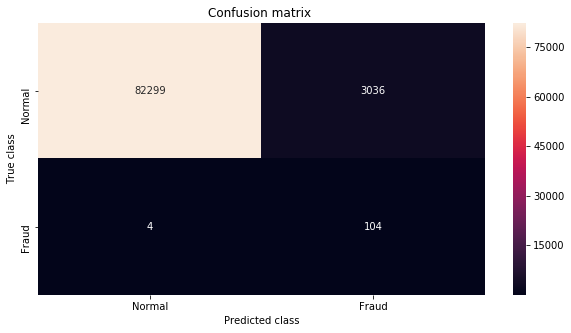

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98     85335
       Fraud       0.03      0.96      0.06       108

    accuracy                           0.96     85443
   macro avg       0.52      0.96      0.52     85443
weighted avg       1.00      0.96      0.98     85443

The number of actual transaction predicted as actual:  82299
The number of fraud transaction predicted as actual:  4
The number of actual transaction predicted as fraud:  3036
The number of fraud transaction predicted as fraud:  104
True positive rate 0.963
False positive rate 0.036


In [109]:
createRandomForestForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

The accuracy for  Oversampled Data  is 0.9998244443664197


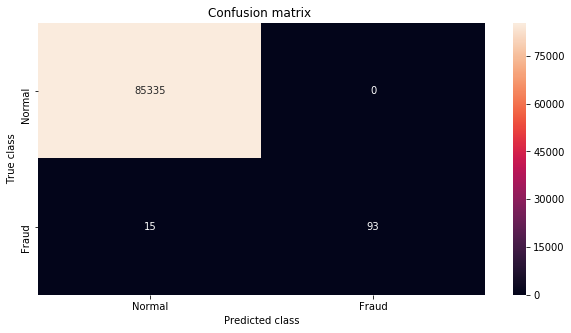

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85335
       Fraud       1.00      0.86      0.93       108

    accuracy                           1.00     85443
   macro avg       1.00      0.93      0.96     85443
weighted avg       1.00      1.00      1.00     85443

The number of actual transaction predicted as actual:  85335
The number of fraud transaction predicted as actual:  15
The number of actual transaction predicted as fraud:  0
The number of fraud transaction predicted as fraud:  93
True positive rate 0.861
False positive rate 0.000


In [110]:
createRandomForestForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

The accuracy for  SmoteOversampled Data  is 0.9998361480753251


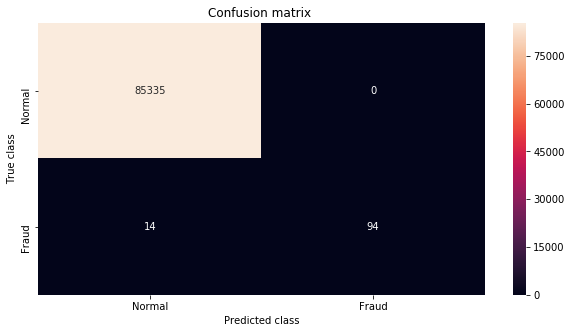

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85335
       Fraud       1.00      0.87      0.93       108

    accuracy                           1.00     85443
   macro avg       1.00      0.94      0.97     85443
weighted avg       1.00      1.00      1.00     85443

The number of actual transaction predicted as actual:  85335
The number of fraud transaction predicted as actual:  14
The number of actual transaction predicted as fraud:  0
The number of fraud transaction predicted as fraud:  94
True positive rate 0.870
False positive rate 0.000


In [111]:
createRandomForestForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

Epoch 1/100
199364/199364 [==============================] - 6s 28us/step - loss: 0.0198 - accuracy: 0.9981
Epoch 2/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0035 - accuracy: 0.9993
Epoch 4/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0035 - accuracy: 0.9993
Epoch 5/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0034 - accuracy: 0.9993
Epoch 6/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 7/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 8/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 9/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 10/100
199364/199364 [

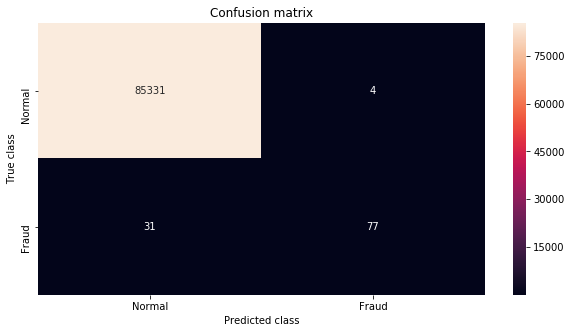

The number of actual transaction predicted as actual:  85331
The number of fraud transaction predicted as actual:  31
The number of actual transaction predicted as fraud:  4
The number of fraud transaction predicted as fraud:  77

True positive rate 0.713
False positive rate 0.000


In [112]:
createANNForSample("normal sample",xTrain,yTrain)

Epoch 1/100
712/712 [==============================] - 0s 372us/step - loss: 0.6932 - accuracy: 0.4944
Epoch 2/100
712/712 [==============================] - 0s 34us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 3/100
712/712 [==============================] - 0s 32us/step - loss: 0.6792 - accuracy: 0.5000
Epoch 4/100
712/712 [==============================] - 0s 32us/step - loss: 0.6291 - accuracy: 0.7233
Epoch 5/100
712/712 [==============================] - 0s 29us/step - loss: 0.5328 - accuracy: 0.8413
Epoch 6/100
712/712 [==============================] - 0s 27us/step - loss: 0.4594 - accuracy: 0.8862
Epoch 7/100
712/712 [==============================] - 0s 24us/step - loss: 0.4235 - accuracy: 0.9129
Epoch 8/100
712/712 [==============================] - 0s 27us/step - loss: 0.4039 - accuracy: 0.9270
Epoch 9/100
712/712 [==============================] - 0s 25us/step - loss: 0.3910 - accuracy: 0.9354
Epoch 10/100
712/712 [==============================] - 0s 24us/step - loss: 0.38

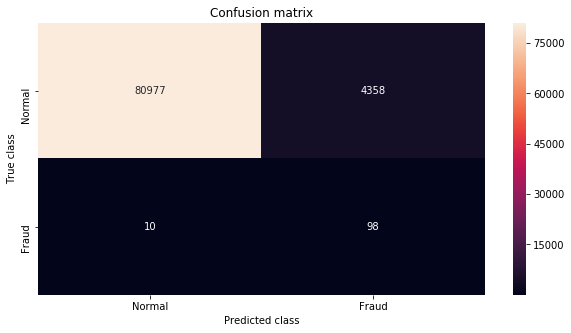

The number of actual transaction predicted as actual:  80977
The number of fraud transaction predicted as actual:  10
The number of actual transaction predicted as fraud:  4358
The number of fraud transaction predicted as fraud:  98

True positive rate 0.907
False positive rate 0.051


In [113]:
createANNForSample("Undersampled Data",xTrainUnderSampled,yTrainUnderSampled)

Epoch 1/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0213 - accuracy: 0.9981
Epoch 2/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0039 - accuracy: 0.9992
Epoch 3/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 6/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 7/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 8/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 9/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 10/100
199364/199364 [

199364/199364 [==============================] - 5s 25us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 75/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 76/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0029 - accuracy: 0.9994 0s - l
Epoch 77/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 78/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 79/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 80/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 81/100
199364/199364 [==============================] - 5s 27us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 82/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 83/100
199364/19936

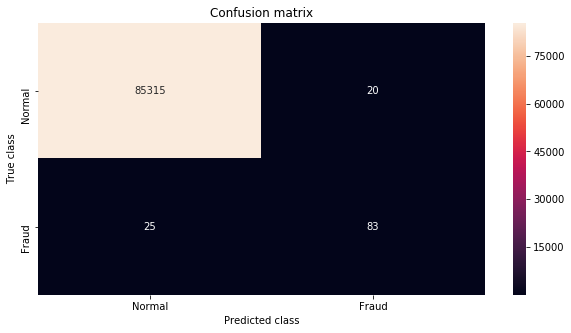

The number of actual transaction predicted as actual:  85315
The number of fraud transaction predicted as actual:  25
The number of actual transaction predicted as fraud:  20
The number of fraud transaction predicted as fraud:  83

True positive rate 0.769
False positive rate 0.000


In [114]:
createANNForSample("Oversampled Data", xTrainOverSampled,yTrainOverSampled)

Epoch 1/100
199364/199364 [==============================] - 6s 29us/step - loss: 0.0210 - accuracy: 0.9982
Epoch 2/100
199364/199364 [==============================] - 5s 27us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 6/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 7/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 8/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 9/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 10/100
199364/199364 [

199364/199364 [==============================] - 5s 26us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 77/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 78/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 79/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 80/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 81/100
199364/199364 [==============================] - 5s 26us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 82/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 83/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 84/100
199364/199364 [==============================] - 5s 25us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 85/100
199364/199364 [====

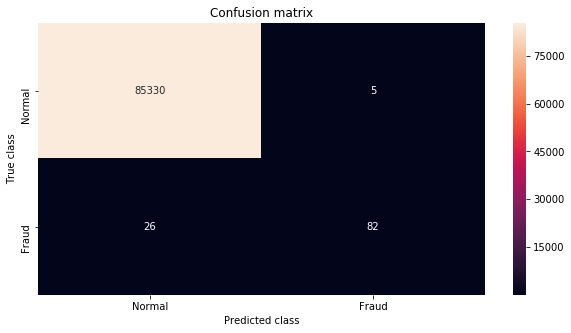

The number of actual transaction predicted as actual:  85330
The number of fraud transaction predicted as actual:  26
The number of actual transaction predicted as fraud:  5
The number of fraud transaction predicted as fraud:  82

True positive rate 0.759
False positive rate 0.000


In [115]:
createANNForSample("SmoteOversampled Data", xTrainSmoteOverSampled,yTrainSmoteOverSampled)

# Observation

| TRAIN TEST DATA     	| DIVIDED RANDOMLY  	|                    	|                     	| TRAIN TEST DATA     	| DIVIDED SEQUENTIALLY 	|                    	|                     	|
|---------------------	|-------------------	|--------------------	|---------------------	|---------------------	|----------------------	|--------------------	|---------------------	|
| Classifier          	| Sample Types      	| True positive rate 	| False-positive rate 	| Classifier          	| Sample Types         	| True positive rate 	| False positive rate 	|
| Logistic Regression 	| normal            	| .596               	| .00                 	| Logistic Regression 	| normal               	| .435               	| .00                 	|
|                     	| undersampled      	| .904               	| .010                	|                     	| undersampled         	| .852               	| .008                	|
|                     	| oversampled       	| .596               	| .00                 	|                     	| oversampled          	| .472               	| .00                 	|
|                     	| smote oversampled 	| .596               	| .00                 	|                     	| smote oversampled    	| .472               	| .00                 	|
| SVM                 	| normal            	| .721               	| .00                 	| SVM                 	| normal               	| .602               	| .00                 	|
|                     	| undersampled      	| .904               	| .012                	|                     	| undersampled         	| .870               	| .010                	|
|                     	| oversampled       	| .721               	| .00                 	|                     	| oversampled          	| .731               	| .00                 	|
|                     	| smote oversampled 	| .721               	| .00                 	|                     	| smote oversampled    	| .731               	| .00                 	|
| Naive Bayes         	| normal            	| .882               	| .009                	| Naive Bayes         	| normal               	| .815               	| .009                	|
|                     	| undersampled      	| .890               	| .013                	|                     	| undersampled         	| .833               	| .011                	|
|                     	| oversampled       	| .882               	| .009                	|                     	| oversampled          	| .824               	| .008                	|
|                     	| smote oversampled 	| .882               	| .009                	|                     	| smote oversampled    	| .824               	| .008                	|
| Decision Tree       	| normal            	| .794               	| .00                 	| Decision Tree       	| normal               	| .685               	| .00                 	|
|                     	| undersampled      	| .934               	| .093                	|                     	| undersampled         	| .954               	| .097                	|
|                     	| oversampled       	| .809               	| .00                 	|                     	| oversampled          	| .880               	| .00                 	|
|                     	| smote oversampled 	| .809               	| .00                 	|                     	| smote oversampled    	| .880               	| .00                 	|
| AdaBoost            	| normal            	| .772               	| .001                	| AdaBoost            	| normal               	| .611               	| .000                	|
|                     	| undersampled      	| .919               	| .085                	|                     	| undersampled         	| .944               	| .076                	|
|                     	| oversampled       	| .801               	| .001                	|                     	| oversampled          	| .870               	| .000                	|
|                     	| smote oversampled 	| .787               	| .001                	|                     	| smote oversampled    	| .870               	| .000                	|
| Random forest       	| normal            	| .816               	| .000                	| Random forest       	| normal               	| .731               	| .000                	|
|                     	| undersampled      	| .934               	| .030                	|                     	| undersampled         	| .963               	| .036                	|
|                     	| oversampled       	| .824               	| .00                 	|                     	| oversampled          	| .861               	| .00                 	|
|                     	| smote oversampled 	| .824               	| .00                 	|                     	| smote oversampled    	| .870               	| .00                 	|
| Neural Network      	| normal            	| .831               	| .00                 	| Neural Network      	| normal               	| .713               	| .00                 	|
|                     	| undersampled      	| .926               	| .058                	|                     	| undersampled         	| .907               	| .051                	|
|                     	| oversampled       	| .846               	| .00                 	|                     	| oversampled          	| .769               	| .00                 	|
|                     	| smote oversampled 	| .824               	| .00                 	|                     	| smote oversampled    	| .759               	| .00                 	|

# Conclusions 

•	Random forest, Decision Tree, Neural Network are relatively the best models for credit card fraud detection  

•	The sampling of data will help in better prediction in models like Random Forest, Decision Tree, AdaBoost and Neural Network  

•	The random division of train test data generally gives better performance 
